In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

# Map Measurement class
Measurement = Base.classes.measurement

# Map Station class
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Inspect Tables
inspector = inspect(engine)

# Get a list of column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
from dateutil.relativedelta import *

# Calculate the date one year from the last date in data set.
# year_ago = (dt.date(2017, 8, 23)) - relativedelta(months=12)
year_ago = (dt.date(2017, 8, 23)) - relativedelta(years=1)
print(year_ago)

2016-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# year_ago = (dt.date(2017, 8 ,23)) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()

prcp_rows = [{"date": result[0], "precipitation": result[1]} for result in results]


# Save the query results as a Pandas DataFrame and set the index to the date column
data_df = pd.DataFrame(prcp_rows)
# data_df = pd.DataFrame(prcp_rows).set_index('date')
# data2_df = pd.DataFrame(results, columns=['date', 'precipiation']).set_index('date')

# Sort the dataframe by date
data_sorted = data_df.sort_values('date', ascending=False)
# data2_sorted = data2_df.sort_values('date')

data_sorted

,date,precipitation
2222,2017-08-23,0.45
1523,2017-08-23,0.08
1005,2017-08-23,0.00
359,2017-08-23,0.00
1522,2017-08-22,0.00
...,...,...
1188,2016-08-24,1.22
1875,2016-08-24,1.45
360,2016-08-24,2.15
1524,2016-08-24,2.15


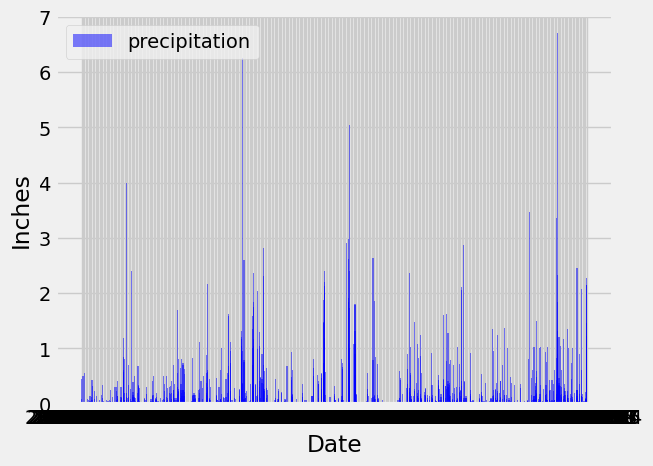

In [13]:
# date = data_sorted['date']
# print(date)
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(data_sorted['date'], data_sorted['precipitation'], color='b', alpha=0.5, align="center")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'])
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Measurement.station).distinct().count()
print(station_total)

9


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
order_by(desc(func.count(Measurement.tobs))).all()
print(station_activity)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Create list of query functions
masel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

# query the table by unpacking list and filtering for station USC00519281
most_active_averages = session.query(*masel).\
    filter(Measurement.station == 'USC00519281').all()

print(most_active_averages)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
most_active_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame
station_tobs_df = pd.DataFrame(most_active_tobs)

# Plot the query results as a histogram using 'bins=12'
station_tobs_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

# Close session

In [ ]:
# Close Session
session.close()